In [1]:
# 利用Dataset对象处理数据
import tensorflow as tf
import numpy as np

dataset = tf.data.Dataset.from_tensor_slices(
    np.array([1.0, 2.0, 3.0, 4.0, 5.0]))

for element in dataset:
    print(element)

tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(2.0, shape=(), dtype=float64)
tf.Tensor(3.0, shape=(), dtype=float64)
tf.Tensor(4.0, shape=(), dtype=float64)
tf.Tensor(5.0, shape=(), dtype=float64)


训练集 : X=(60000, 28, 28), y=(60000,)
测试集 : X=(10000, 28, 28), y=(10000,)


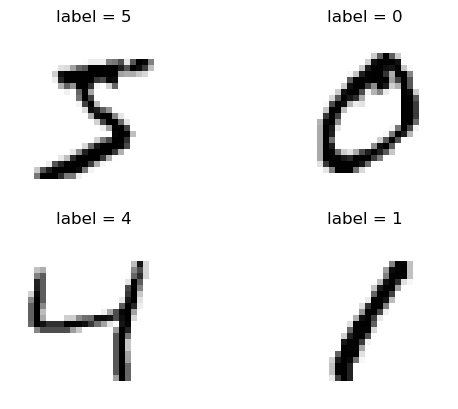

In [2]:
# 加载数据
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

# 导入数据
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

print('训练集 : X={0}, y={1}'.format(X_train.shape, y_train.shape))
print('测试集 : X={0}, y={1}'.format(X_test.shape, y_test.shape))

# 绘制单个图片
for i in range(4):
    # 定义子图
    plt.subplot(2, 2, i + 1)
    # 绘制像素数据
    plt.title('label = {0}'.format(y_train[i]))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray_r'))
    plt.axis('off')
# 显示图片
plt.show()

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics

# 导入数据
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# 随机选择30000张训练图片，6w/64*10太多步
indices = np.random.choice(len(X_train), 30000, replace=False)
X_train = X_train[indices]
y_train = y_train[indices]

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32) / 255.
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.batch(64).repeat(10)

# 获取图片的大小
in_shape = X_train.shape[1:]  # 形状为(28, 28)
# 获取数字图片的种类
n_classes = len(np.unique(y_train))  # 类别数为10

model = Sequential()  # 指定空顺序模型
model.add(layers.Flatten(input_shape=in_shape))
model.add(layers.Dense(n_classes, activation='softmax'))

# 设置优化器，学习率0.01
optimizer = optimizers.SGD(learning_rate=0.01)
# 设置算法性能的评估标准
acc_meter = metrics.Accuracy()

for step, (x, y) in enumerate(dataset):
    with tf.GradientTape() as tape:
        # 计算数据输出
        out = model(x)
        # 将标签变成热编码
        y_onehot = tf.one_hot(y, depth=10)
        # 计算损失（使用更合适的交叉熵损失）
        loss = tf.keras.losses.categorical_crossentropy(y_onehot, out)
        # 计算损失均值
        loss = tf.reduce_mean(loss)
        acc_meter.update_state(tf.argmax(out, axis=1), y)
    
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if step % 1000 == 0:
        print('step {0}, loss:{1:.3f}, acc:{2:.2f} %'.format(step, float(loss),
                                                             acc_meter.result().numpy() * 100))
        acc_meter.reset_state()

step 0, loss:2.350, acc:10.94 %
step 1000, loss:0.654, acc:77.48 %
step 2000, loss:0.489, acc:86.32 %
step 3000, loss:0.342, acc:87.71 %
step 4000, loss:0.575, acc:88.34 %


In [7]:
# 构建带有编译参数的模型
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras

def preprocess(x, y):
    # 标准化到0~1
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [-1, 28 * 28])  # 打平
    y = tf.cast(y, dtype=tf.int32)  # 转换成整型张量
    y = tf.one_hot(y, depth=10)
    return x, y

# 导入数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 获取图片的大小
in_shape = X_train.shape[1:]  # 形状为(28, 28)
# 获取数字图片的种类
n_classes = len(np.unique(y_train))  # 类别数为10

# 数据预处理：将0~255缩放到0~1范围
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

model = keras.Sequential()  # 搭建空顺序模型
model.add(keras.layers.Flatten(input_shape=in_shape))
model.add(keras.layers.Dense(n_classes, activation='softmax'))

# 编译模型：定义损失函数和优化函数
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
import os
# 模型保存json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# 模型保存hdf5（新版本权重以.weights.h5结尾）
model.save_weights("model.weights.h5")

# 保存路径
current_dir = os.getcwd()
print("成功保存模型到当前目录:", current_dir)
print("模型结构文件:", os.path.join(current_dir, "model.json"))
print("模型权重文件:", os.path.join(current_dir, "model.weights.h5"))

成功保存模型到当前目录: D:\N01_CSTRecourse\m02_2025-2026-01\MLcode
模型结构文件: D:\N01_CSTRecourse\m02_2025-2026-01\MLcode\model.json
模型权重文件: D:\N01_CSTRecourse\m02_2025-2026-01\MLcode\model.weights.h5


In [12]:
# 序列化重构
from tensorflow.keras.models import model_from_json
# 读入模型文件
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

# 反序列化：导入模型拓扑结构
loaded_model = model_from_json(loaded_model_json)
# 反序列化：将权值导入到加载的模型中
loaded_model.load_weights("model.weights.h5")
print("成功：从本地文件中导入权值参数！")

# 编译导入的模型
loaded_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# 测试模型是否可用
loss, acc = loaded_model.evaluate(X_test, y_test, verbose=0)
print("测试集合的预测准确率:{0:.2f} %".format(acc * 100))

成功：从本地文件中导入权值参数！
测试集合的预测准确率:92.63 %
